In [230]:
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

random.seed(42)

#Definição do número de exemplos de casos fraude e casos normais
n_fraude = 5000
n_normal = 5000

#Definição do atributo "renda" para ambas as classes.
renda_fraude = np.random.normal(1300,1250,n_fraude*2)
renda_fraude_retirados = renda_fraude[renda_fraude<700]
renda_fraude = np.setdiff1d(renda_fraude, renda_fraude_retirados)
valores_alem = np.random.choice(renda_fraude, renda_fraude.size - 5000, replace=False)
renda_fraude = np.setdiff1d(renda_fraude, valores_alem)
renda_normal = np.random.normal(1000,1250,n_normal*2)
renda_normal_retirados = renda_normal[renda_normal<700]
renda_normal = np.setdiff1d(renda_normal, renda_normal_retirados)
valores_alem = np.random.choice(renda_normal, renda_normal.size - 5000, replace=False)
renda_normal = np.setdiff1d(renda_normal, valores_alem)

#Definição do atributo "valor da compra" para ambas as classes.
#valor_compra_fraude = np.random.normal(400,100,n_fraude)
valor_compra_fraude = np.random.uniform(100,1200,n_fraude)
valor_compra_normal = np.random.normal(400,250,n_normal*2)
valor_compra_normal = valor_compra_normal[valor_compra_normal>0]
valores_alem = np.random.choice(valor_compra_normal, valor_compra_normal.size - 5000, replace=False)
valor_compra_normal = np.setdiff1d(valor_compra_normal, valores_alem)

#Definição do atributo "media dos gastos nos ultimos 3 meses" para ambas as classes.
#https://www.terra.com.br/noticias/dino/a-cada-3-meses-o-brasileiro-gasta-cerca-de-r661-em-compras-pela-internet,70f7a51ef268f3648d98bec463372741o1lsr05w.html
media_gastos_fraude = np.random.normal(661,340,n_fraude*2)
media_gastos_normal = np.random.normal(661,340,n_normal*2)
media_gastos_fraude_retirados = media_gastos_fraude[media_gastos_fraude<=0]
media_gastos_normal_retirados = media_gastos_normal[media_gastos_normal<=0]
media_gastos_normal = np.setdiff1d(media_gastos_normal, media_gastos_normal_retirados)
media_gastos_fraude = np.setdiff1d(media_gastos_fraude, media_gastos_fraude_retirados)
valores_alem = np.random.choice(media_gastos_normal, media_gastos_normal.size - 5000, replace=False)
media_gastos_normal = np.setdiff1d(media_gastos_normal, valores_alem)
valores_alem = np.random.choice(media_gastos_fraude, media_gastos_fraude.size - 5000, replace=False)
media_gastos_fraude = np.setdiff1d(media_gastos_fraude, valores_alem)


'''Categorias:
   1->Eletronicos e Celulares
   2->Eletrodomesticos
   3->Informatica e Games
   4->Outros
   5->Vestimenta
   6->Saude e beleza'''
#https://novonegocio.com.br/empreendedorismo/produtos-mais-vendidos-internet//} 	
categoria_compra_fraude = np.random.rand(n_fraude)
categoria_compra_fraude_aux = categoria_compra_fraude
categoria_compra_fraude[categoria_compra_fraude <= 0.55] = 1
categoria_compra_fraude[categoria_compra_fraude <= 0.8] = 2
categoria_compra_fraude[categoria_compra_fraude <= 0.9] = 3
categoria_compra_fraude[categoria_compra_fraude < 1] = 4

values = np.array(categoria_compra_fraude)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
categoria_compra_fraude = onehot_encoder.fit_transform(integer_encoded)

categoria_compra_fraude_1, categoria_compra_fraude_2, categoria_compra_fraude_3,categoria_compra_fraude_4 = categoria_compra_fraude.T
categoria_compra_fraude_5 = np.zeros(n_fraude)
categoria_compra_fraude_6 = np.zeros(n_fraude)

categoria_compra_normal = np.random.rand(n_normal)
categoria_compra_normal_aux = categoria_compra_normal
categoria_compra_normal[categoria_compra_normal <= 0.4] = 1
categoria_compra_normal[categoria_compra_normal <= 0.65] = 3
categoria_compra_normal[categoria_compra_normal <= 0.8] = 5
categoria_compra_normal[categoria_compra_normal <= 0.85] = 6
categoria_compra_normal[categoria_compra_normal <= 0.9] = 2
categoria_compra_normal[categoria_compra_normal < 1] = 4

values = np.array(categoria_compra_normal)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
categoria_compra_normal = onehot_encoder.fit_transform(integer_encoded)

categoria_compra_normal_1, categoria_compra_normal_2, categoria_compra_normal_3,categoria_compra_normal_4, categoria_compra_normal_5, categoria_compra_normal_6 = categoria_compra_normal.T

#https://ecommercenews.com.br/noticias/pesquisas-noticias/brasil-tem-horario-de-pico-de-compras-online-das-12h-as-14-diz-pesquisa/
horario_compra_fraude = np.random.normal(13,3,n_fraude);
horario_compra_normal = np.random.normal(13,3,n_normal);

#Definição do atributo "compra parcelada" para ambas as classes.
#Se foi parcelada > 1
#Se não > 0
compra_parcelada_fraude = np.zeros(n_fraude)
compra_parcelada_normal = np.zeros(n_normal)
compra_parcelada_normal[random.randint(2500, 2700): random.randint(4700, 5000)] = 1
np.random.shuffle(compra_parcelada_normal)

#Definição de um inteiro aleatório para ser usado na criação do atributo "primeira compra na loja"
num_aleatorio = random.randint(3500, 4000)

#Definição do atributo "primeira compra na loja" para ambas as classes.
#Se foi a primeira compra > 1
#Se não > 0
primeira_compra_loja_fraude = np.concatenate((np.ones(num_aleatorio), np.zeros(5000-num_aleatorio)))
primeira_compra_loja_normal = np.concatenate((np.zeros(num_aleatorio), np.ones(5000-num_aleatorio)))
np.random.shuffle(primeira_compra_loja_fraude)
np.random.shuffle(primeira_compra_loja_normal)

#Definição do atributo "usou cartão virtual" para ambas as classes.
#Se usou > 1
#Se não > 0
usou_cartao_virtual_fraude = np.zeros(n_fraude)
usou_cartao_virtual_normal = np.concatenate((np.zeros(3700), np.ones(1300)))
np.random.shuffle(usou_cartao_virtual_normal)

X_normal = np.vstack([renda_normal, media_gastos_normal, valor_compra_normal, categoria_compra_normal_1, categoria_compra_normal_2, categoria_compra_normal_3, categoria_compra_normal_4, categoria_compra_normal_5, categoria_compra_normal_6, horario_compra_normal, compra_parcelada_normal, usou_cartao_virtual_normal, primeira_compra_loja_normal]).T
X_fraude = np.vstack([renda_fraude, media_gastos_fraude, valor_compra_fraude, categoria_compra_fraude_1, categoria_compra_fraude_2, categoria_compra_fraude_3, categoria_compra_fraude_4, categoria_compra_fraude_5, categoria_compra_fraude_6, horario_compra_fraude, compra_parcelada_fraude, usou_cartao_virtual_fraude, primeira_compra_loja_fraude]).T

X = np.vstack ([ X_normal , X_fraude ])

y = np.array ([0] * n_normal + [1] * n_fraude )

In [134]:
[categoria_compra_fraude_aux[categoria_compra_fraude_aux==1].size, categoria_compra_fraude_aux[categoria_compra_fraude_aux==2].size, categoria_compra_fraude_aux[categoria_compra_fraude_aux==3].size, categoria_compra_fraude_aux[categoria_compra_fraude_aux==4].size,  categoria_compra_fraude_aux[categoria_compra_fraude_aux==5].size]

[2823, 1220, 492, 465, 0]

In [133]:
[categoria_compra_normal_aux[categoria_compra_normal_aux==1].size, categoria_compra_normal_aux[categoria_compra_normal_aux==2].size, categoria_compra_normal_aux[categoria_compra_normal_aux==3].size, categoria_compra_normal_aux[categoria_compra_normal_aux==4].size, categoria_compra_normal_aux[categoria_compra_normal_aux==5].size, categoria_compra_normal_aux[categoria_compra_normal_aux==6].size] 

[1999, 249, 1221, 529, 746, 256]

In [231]:
y_aux = np.array([y])
X_and_y = np.concatenate((X, y_aux.T), axis=1)

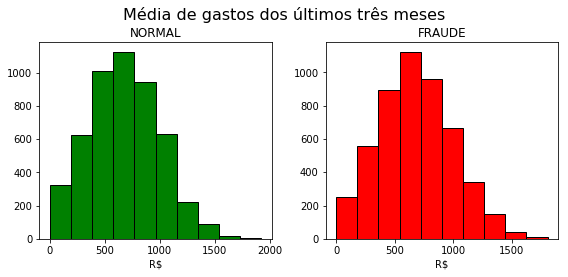

In [180]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.ravel()

count, bins, ignored = ax[0].hist(media_gastos_normal, 10, edgecolor='black', color = 'green')
ax[0].set_title("NORMAL")
ax[0].set_xlabel("R$")
count, bins, ignored = ax[1].hist(media_gastos_fraude, 10, edgecolor='black', color='red')
ax[1].set_title("FRAUDE")
ax[1].set_xlabel("R$")
f.suptitle('Média de gastos dos últimos três meses', fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

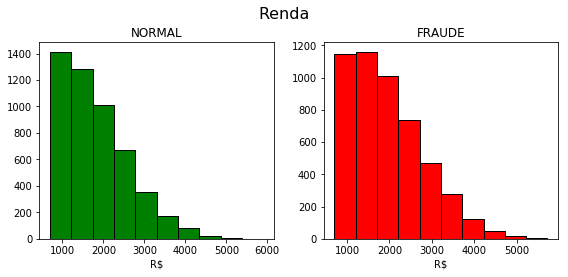

In [204]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.ravel()

count, bins, ignored = ax[0].hist(renda_normal, 10, edgecolor='black', color = 'green')
ax[0].set_title("NORMAL")
ax[0].set_xlabel("R$")
count, bins, ignored = ax[1].hist(renda_fraude, 10, edgecolor='black', color='red')
ax[1].set_title("FRAUDE")
ax[1].set_xlabel("R$")
f.suptitle('Renda', fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

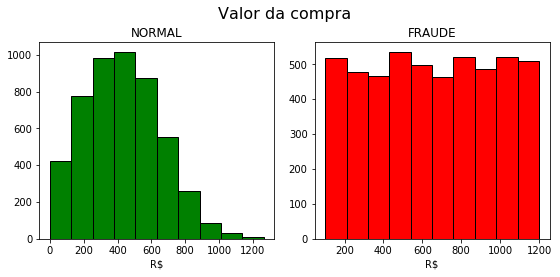

In [178]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.ravel()

count, bins, ignored = ax[0].hist(valor_compra_normal, 10, edgecolor='black', color = 'green')
ax[0].set_title("NORMAL")
ax[0].set_xlabel("R$")
count, bins, ignored = ax[1].hist(valor_compra_fraude, 10, edgecolor='black', color='red')
ax[1].set_title("FRAUDE")
ax[1].set_xlabel("R$")
f.suptitle('Valor da compra', fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

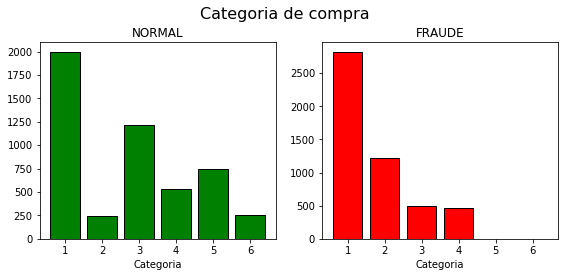

In [139]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.ravel()

ax[0].bar(x = [1, 2, 3, 4, 5, 6], height = [1999, 249, 1221, 529, 746, 256], edgecolor='black', color = 'green')
ax[0].set_title("NORMAL")
ax[0].set_xlabel("Categoria")
ax[1].bar(x = [1, 2, 3, 4, 5, 6], height = [2823, 1220, 492, 465, 0 , 0], edgecolor='black', color='red')
ax[1].set_title("FRAUDE")
ax[1].set_xlabel("Categoria")
f.suptitle('Categoria de compra', fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

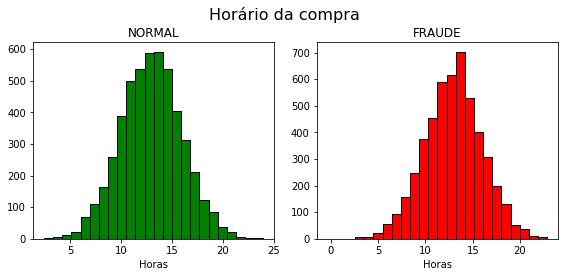

In [150]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.ravel()

count, bins, ignored = ax[0].hist(horario_compra_normal, 24, edgecolor='black', color = 'green')
ax[0].set_title("NORMAL")
ax[0].set_xlabel("Horas")
count, bins, ignored = ax[1].hist(horario_compra_fraude, 24, edgecolor='black', color='red')
ax[1].set_title("FRAUDE")
ax[1].set_xlabel("Horas")
f.suptitle('Horário da compra', fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

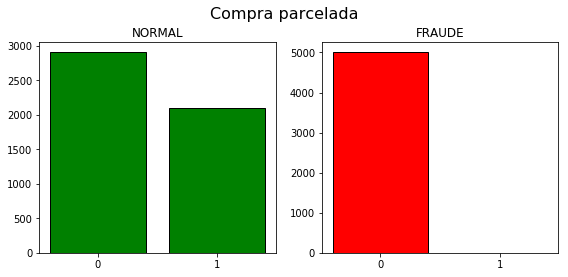

In [157]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.ravel()

ax[0].bar(x = ['0', '1'],height = [(compra_parcelada_normal[compra_parcelada_normal == 0]).size, (compra_parcelada_normal[compra_parcelada_normal == 1]).size], edgecolor='black', color = 'green')
ax[0].set_title("NORMAL")
ax[1].bar(x = ['0', '1'],height = [(compra_parcelada_fraude[compra_parcelada_fraude == 0]).size, (compra_parcelada_fraude[compra_parcelada_fraude == 1]).size], edgecolor='black', color = 'red')
ax[1].set_title("FRAUDE")
f.suptitle('Compra parcelada', fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

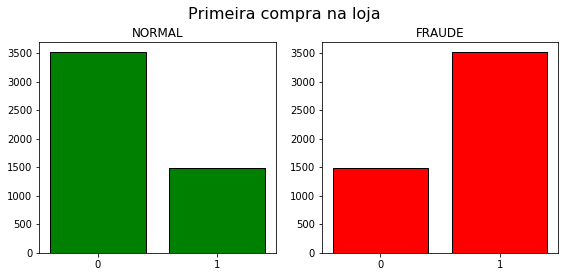

In [175]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.ravel()

ax[0].bar(x = ['0', '1'],height = [(primeira_compra_loja_normal[primeira_compra_loja_normal == 0]).size, (primeira_compra_loja_normal[primeira_compra_loja_normal == 1]).size], edgecolor='black', color = 'green')
ax[0].set_title("NORMAL")
ax[1].bar(x = ['0', '1'],height = [(primeira_compra_loja_fraude[primeira_compra_loja_fraude == 0]).size, (primeira_compra_loja_fraude[primeira_compra_loja_fraude == 1]).size], edgecolor='black', color = 'red')
ax[1].set_title("FRAUDE")
f.suptitle('Primeira compra na loja', fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

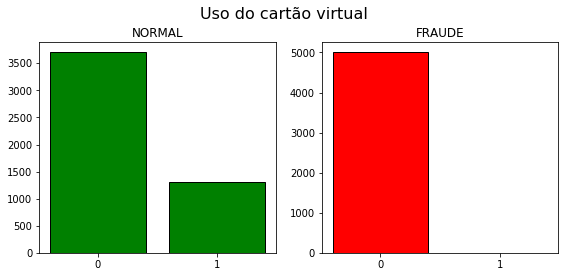

In [177]:
%matplotlib inline

import matplotlib.pyplot as plt

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = ax.ravel()

ax[0].bar(x = ['0', '1'],height = [(usou_cartao_virtual_normal[usou_cartao_virtual_normal == 0]).size, (usou_cartao_virtual_normal[usou_cartao_virtual_normal == 1]).size], edgecolor='black', color = 'green')
ax[0].set_title("NORMAL")
ax[1].bar(x = ['0', '1'],height = [(usou_cartao_virtual_fraude[usou_cartao_virtual_fraude == 0]).size, (usou_cartao_virtual_fraude[usou_cartao_virtual_fraude == 1]).size], edgecolor='black', color = 'red')
ax[1].set_title("FRAUDE")
f.suptitle('Uso do cartão virtual', fontsize=16)
f.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();

In [260]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier( criterion='gini', max_depth=5, splitter='best', min_samples_leaf=0.05, min_samples_split=0.05)
dtree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.05, min_samples_split=0.05,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [232]:
X.shape

(10000, 13)

In [234]:
from sklearn.utils import shuffle

X_and_y = shuffle(X_and_y)
X = X_and_y[:,:-1]
y = X_and_y[:,-1]

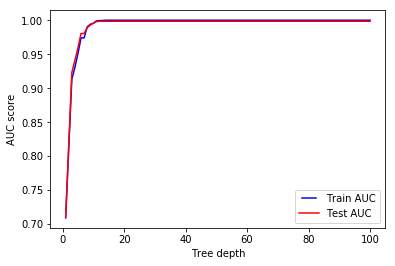

In [185]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.legend_handler import HandlerLine2D

kFold = KFold(n_splits=5)

max_depths = np.linspace(1, 100, 100, endpoint=True)

auc_test =[]
auc_train = []
train_results = []
test_results = []

for max_depth in max_depths:
    for train_index, test_index in kFold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        dtree=DecisionTreeClassifier( criterion='entropy', splitter='best', max_depth=max_depth)
        dtree.fit(X_train, Y_train)
        Y_pred_train = dtree.predict(X_train)
        Y_pred_test = dtree.predict(X_test)
        Y_pred_prob_train = dtree.predict_proba(X_train)
        Y_pred_prob_test = dtree.predict_proba(X_test)
        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, Y_pred_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

    auc_train.append(float(roc_auc_score(Y_train,Y_pred_prob_train[:,1])))
    auc_test.append(float(roc_auc_score(Y_test,Y_pred_prob_test[:,1])))
    #print("max_depth: ", max_depth, ", train: ", np.mean(auc_train), ", test:", np.mean(auc_test),"\n")

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

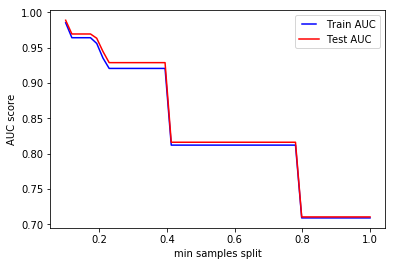

In [186]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.legend_handler import HandlerLine2D

kFold = KFold(n_splits=5)

min_samples_splits = np.linspace(0.1, 1.0, 50, endpoint=True)

auc_test =[]
auc_train = []
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    for train_index, test_index in kFold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        dtree=DecisionTreeClassifier(min_samples_split=min_samples_split)
        dtree.fit(X_train, Y_train)
        Y_pred_train = dtree.predict(X_train)
        Y_pred_test = dtree.predict(X_test)
        Y_pred_prob_train = dtree.predict_proba(X_train)
        Y_pred_prob_test = dtree.predict_proba(X_test)
        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, Y_pred_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

    auc_train.append(float(roc_auc_score(Y_train,Y_pred_prob_train[:,1])))
    auc_test.append(float(roc_auc_score(Y_test,Y_pred_prob_test[:,1])))
    #print("max_depth: ", max_depth, ", train: ", np.mean(auc_train), ", test:", np.mean(auc_test),"\n")


line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

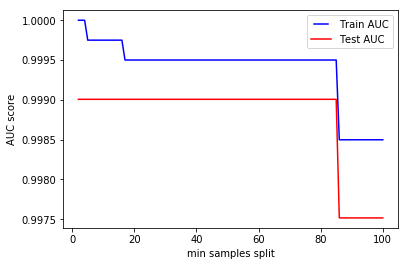

In [187]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.legend_handler import HandlerLine2D

kFold = KFold(n_splits=5)

min_samples_splits = np.linspace(2, 100, 99, endpoint=True)

auc_test =[]
auc_train = []
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    for train_index, test_index in kFold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        dtree=DecisionTreeClassifier(min_samples_split=int(min_samples_split))
        dtree.fit(X_train, Y_train)
        Y_pred_train = dtree.predict(X_train)
        Y_pred_test = dtree.predict(X_test)
        Y_pred_prob_train = dtree.predict_proba(X_train)
        Y_pred_prob_test = dtree.predict_proba(X_test)
        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, Y_pred_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

    auc_train.append(float(roc_auc_score(Y_train,Y_pred_prob_train[:,1])))
    auc_test.append(float(roc_auc_score(Y_test,Y_pred_prob_test[:,1])))
    #print("max_depth: ", max_depth, ", train: ", np.mean(auc_train), ", test:", np.mean(auc_test),"\n")


line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

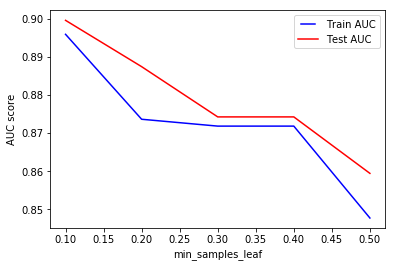

In [479]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.legend_handler import HandlerLine2D

kFold = KFold(n_splits=5)

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

auc_test =[]
auc_train = []
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    for train_index, test_index in kFold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        dtree=DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
        dtree.fit(X_train, Y_train)
        Y_pred_train = dtree.predict(X_train)
        Y_pred_test = dtree.predict(X_test)
        Y_pred_prob_train = dtree.predict_proba(X_train)
        Y_pred_prob_test = dtree.predict_proba(X_test)
        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, Y_pred_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

    auc_train.append(float(roc_auc_score(Y_train,Y_pred_prob_train[:,1])))
    auc_test.append(float(roc_auc_score(Y_test,Y_pred_prob_test[:,1])))
    #print("max_depth: ", max_depth, ", train: ", np.mean(auc_train), ", test:", np.mean(auc_test),"\n")


line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

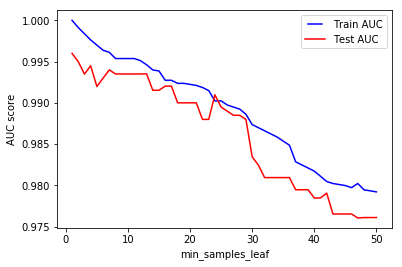

In [483]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.legend_handler import HandlerLine2D

kFold = KFold(n_splits=5)

min_samples_leafs = np.linspace(1, 50, 50, endpoint=True)

auc_test =[]
auc_train = []
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    for train_index, test_index in kFold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        dtree=DecisionTreeClassifier(min_samples_leaf=int(min_samples_leaf))
        dtree.fit(X_train, Y_train)
        Y_pred_train = dtree.predict(X_train)
        Y_pred_test = dtree.predict(X_test)
        Y_pred_prob_train = dtree.predict_proba(X_train)
        Y_pred_prob_test = dtree.predict_proba(X_test)
        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, Y_pred_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

    auc_train.append(float(roc_auc_score(Y_train,Y_pred_prob_train[:,1])))
    auc_test.append(float(roc_auc_score(Y_test,Y_pred_prob_test[:,1])))
    #print("max_depth: ", max_depth, ", train: ", np.mean(auc_train), ", test:", np.mean(auc_test),"\n")


line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

In [191]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.legend_handler import HandlerLine2D

kFold = KFold(n_splits=5)

max_features = np.linspace(1, 12, 12, endpoint=True)

auc_test =[]
auc_train = []
train_results = []
test_results = []

for max_feature in max_features:
    for train_index, test_index in kFold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        dtree=DecisionTreeClassifier( criterion='entropy', splitter='best', max_features=int(max_feature))
        dtree.fit(X_train, Y_train)
        Y_pred_train = dtree.predict(X_train)
        Y_pred_test = dtree.predict(X_test)
        Y_pred_prob_train = dtree.predict_proba(X_train)
        Y_pred_prob_test = dtree.predict_proba(X_test)
        
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, Y_pred_train)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

    auc_train.append(float(roc_auc_score(Y_train,Y_pred_prob_train[:,1])))
    auc_test.append(float(roc_auc_score(Y_test,Y_pred_prob_test[:,1])))
    #print("max_depth: ", max_depth, ", train: ", np.mean(auc_train), ", test:", np.mean(auc_test),"\n")

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max features')
plt.show()

ValueError: max_features must be in (0, n_features]

In [256]:
dtree.feature_importances_

array([0.        , 0.01740372, 0.1137421 , 0.        , 0.01584043,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.47595824, 0.22935988, 0.14769563])

In [261]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG, Image
from graphviz import Source
from IPython.display import display
import os
os.environ["PATH"] += os.pathsep + 'C:/Use/spedrogabriel/Anaconda3/Lib/site-packages/graphviz'

In [262]:
graph = Source(tree.export_graphviz(dtree, out_file=None
   , feature_names=("renda", "media_gastos", "valor_compra", "categoria_compra_1", 
                    "categoria_compra_2", "categoria_compra_3", "categoria_compra_4", "categoria_compra_5", 
                    "categoria_compra_6", "horario_compra", "compra_parcelada", "uso_cartao_virtual", "primeira_compra"), class_names=['normal', 'fraude'] 
   , filled = True))

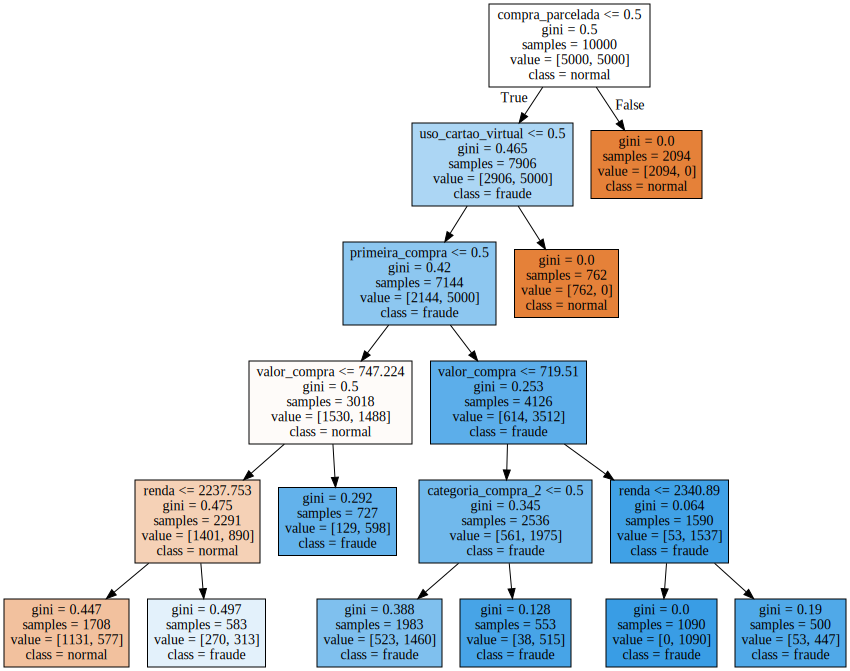

In [263]:
display(SVG(graph.pipe(format='svg')))